In [ ]:
# data packages
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.model_selection import train_test_split # simple TT split cv

# keras + torch
from keras.datasets import mnist
import keras as kb
import torch

# set up torch backend
import os
os.environ["KERAS_BACKEND"] = "torch"

# plotting
import matplotlib.pyplot as plt

# Basic Torch Operations

While we'll often be using the neural network specific parts of Torch (or using it through Keras), it's good to know what's going on "under the hood" so let's look at how Torch represents tensors, and how we can use them.


First we'll look at a few ways to create a torch tensor:

In [ ]:
x = torch.tensor([2, 3])

In [ ]:
x = torch.ones(size=(2, 2))

In [ ]:
x = torch.zeros(size=(2, 1))

In [ ]:
x = torch.rand(size=(2,1))

In [ ]:
x = torch.reshape(x,(-1,))
x.size()

torch.Size([2])

Next, we'll look at some matrix operations we can do using tensors.

In [ ]:
torch.square(x)

tensor([0.2726, 0.3048])

In [ ]:
torch.sqrt(x)

tensor([0.7226, 0.7430])

In [ ]:
y = torch.ones(size = (2,1))

x + y

tensor([[1.5221, 1.5521],
        [1.5221, 1.5521]])

In [ ]:
z = torch.rand(size = (2,2))
torch.matmul(z,x) #2x2 * 2*1

tensor([0.9812, 0.4960])

In [ ]:
torch.dot(torch.tensor([2, 3]), torch.tensor([2, 1]))

tensor(7)

# Gradients (the reason we're all here)

So far, Torch is looking a lot like a fancy numpy. But it's a lot more than that. Torch allows us to very easily calculate and track gradients, and use them to update parameters in our model.


# Linear Regression with Torch

Here we'll build a Linear Regression Model from scratch using JUST PyTorch. Let's look at the code to see how it works (luckily we won't often do this):

In [ ]:
# generate data
X = torch.arange(-5, 5, 0.1).view(-1, 1) #.view() reshapes our data to be an array with a single dimension
# X.size()

# coefficient is -6, intercept is 4
Y = 4 + -6 * X + 0.2 * torch.randn(X.size())

First, we'll define two functions: `forward` and `loss` which define what a forward pass (prediction) of the model, and the loss function for the model (MSE), respectively.

In [ ]:
# a forward pass is how we use the model to make a prediction
def forward(x):
    return w * x + b

# define a loss function, in this case MSE
def loss(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

Then we'll define torch `tensor` objects that will store and track our different model parameters (`w` the coefficient for our model, and `b` the intercept/bias of the model).

Next, we'll set a few parameters:

- `step_size`: this determines the size of the adjustment we're making to our parameters at each update (remember: $w_{new} = w_{old} - \alpha * g$)
- `loss_list`: a list to store our loss history, so we can plot it later
- `iter`: the number of updates to make to our parameters

In [ ]:
w = torch.tensor(-10.0, requires_grad=True) # create a tensor to store our coefficient, set it to -10 initially
b = torch.tensor(-20.0, requires_grad=True) # create a tensor to store our intercept, set it to -20 initially


# how BIG of an adjustment should we make to w and b each step
step_size = 0.1

# track loss over time
loss_list = []

# number of steps
iter = 100

Now, we'll use a `for` loop to actually run our updates.

We will:

1. do a forward pass (make a prediction using current weights)
2. calculate the loss from those predictions
3. store the loss
4. do a packward pass (calculate the gradients)
5. update our parameters, `w` and `b`
6. zero out our gradients so we can start over on the next iteration

In [ ]:
for i in range(iter):
  # 1. making predictions
  Y_pred = forward(X)

  # 2. calculating the loss
  loss_val = loss(Y_pred, Y)

  # 3. storing the calculated loss in a list
  loss_list.append(loss_val.item())

  # 4. backward pass for computing the gradients of the loss w.r.t to w and b
  loss_val.backward()

  # 5. update the w/b
  w.data = w.data - step_size * w.grad.data
  b.data = b.data - step_size * b.grad.data

  # 6. zeroing gradients after each iteration
  w.grad.data.zero_()
  b.grad.data.zero_()

  # priting the values for understanding
  print('iter: {}, \tloss: {}, \tcoef: {}, \tinterc: {}'.format(i, loss_val.item(), w.item(), b.item()))

iter: 0, 	loss: 0.04759201034903526, 	coef: -6.009518146514893, 	interc: 4.005242824554443
iter: 1, 	loss: 0.04759201034903526, 	coef: -6.009518146514893, 	interc: 4.005242824554443
iter: 2, 	loss: 0.04759201034903526, 	coef: -6.009518146514893, 	interc: 4.005242824554443
iter: 3, 	loss: 0.04759201034903526, 	coef: -6.009518146514893, 	interc: 4.005242824554443
iter: 4, 	loss: 0.04759201034903526, 	coef: -6.009518146514893, 	interc: 4.005242824554443
iter: 5, 	loss: 0.04759201034903526, 	coef: -6.009518146514893, 	interc: 4.005242824554443
iter: 6, 	loss: 0.04759201034903526, 	coef: -6.009518146514893, 	interc: 4.005242824554443
iter: 7, 	loss: 0.04759201034903526, 	coef: -6.009518146514893, 	interc: 4.005242824554443
iter: 8, 	loss: 0.04759201034903526, 	coef: -6.009518146514893, 	interc: 4.005242824554443
iter: 9, 	loss: 0.04759201034903526, 	coef: -6.009518146514893, 	interc: 4.005242824554443
iter: 10, 	loss: 0.04759201034903526, 	coef: -6.009518146514893, 	interc: 4.00524282455444

Last, we'll plot our loss over time. Notice we converge on the true values quite quickly!

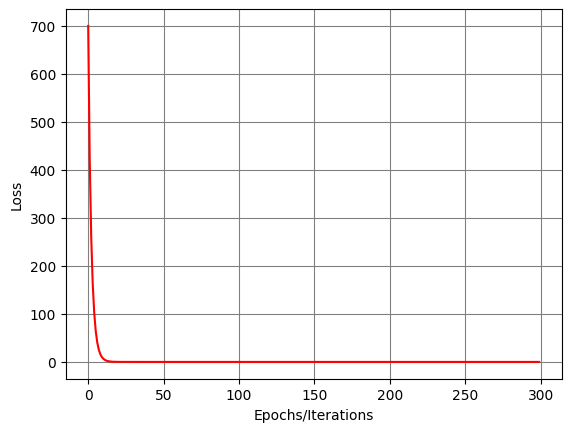

In [ ]:
plt.plot(loss_list, 'r')
plt.grid('True', color='grey')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

# Basic Keras Compnents

Now that we've seen how pyTorch works "under the hood", let's see how we can use Keras (with a pyTorch backend) to create neural networks.

There are 3 main ways we'll interact with the Keras package: Using **`Sequential()`** (which is what we've done up to this point), using the **Functional API**, and **Subclassing** the `Model` class.

## Model Objects
- `Model()`: an object that groups layers together to be trained and to make predictions


With `Model()` objects we can either use the **Functional API** to interface with them, or we can **subclass** the `Model()` object.

### Functional API
Here, we treat layers as functions that have input tensors and output tensors. Each layer takes in the output from the previous layer.

In [ ]:
# Functional API building

inputs = kb.Input(shape = (25,))

x = kb.layers.Dense(10)(inputs)

x = kb.layers.Dense(5)(x)

x = kb.layers.Dense(2)(x)

outputs = kb.layers.Dense(1, activation = kb.activations.relu)(x)

model = kb.Model(inputs = inputs, outputs = outputs)

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense (Dense)               (None, 10)                260       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 330 (1.29 KB)
Trainable params: 330 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Or we can create a new class that inherits from `Model()`.

First we create a class that inherets from `kb.Model`, and then we create an `__init__` method that first calls the superclass' `__init__()` and then defines every layer that we need. We want this to happen in the constructor, otherwise the layers might be created more than once (which we do not want).

Then we create a `call()` method which basically defines what a forward pass of your model looks like. It takes in the default `self` arugment as well as some input to the model. This looks similar to how we defined things using the Functional API. Then we return the output of the model.

Now we can use this subclass to build a model!
- We create inputs
- We put those inputs into our model object
- We put both into a `Model()` object


In [ ]:
# we won't do this often but its nice to know

class MyModel(kb.Model):

    def __init__(self):
        # call init from inhereted class
        super().__init__()

        # create all layers here so they're only created once
        self.layer1 = kb.layers.Dense(10, input_shape = [25])
        self.layer2 = kb.layers.Dense(5)
        self.layer3 = kb.layers.Dense(2)
        self.layer4 = kb.layers.Dense(1, activation = "sigmoid")

    def call(self, inputs):
        # define what a forward pass looks like
        x = self.layer1(inputs)
        x = self.layer2(x)
        x = self.layer3(x)
        return(self.layer4(x))

# define input shape
inputs = kb.Input(shape = (25,))

# create a model using your custom class
x = MyModel()(inputs)

# shove the inputs and outputs into a model object
my_model = kb.Model(inputs = inputs, outputs = x)

# show me the model
my_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25)]              0         
                                                                 
 my_model (MyModel)          (None, 1)                 330       
                                                                 
Total params: 330 (1.29 KB)
Trainable params: 330 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Sequential Object

- `Sequential()`: an object that groups layers together in a linear stack (less flexible than `Model` but typically all we need)

This is what we've done so far (and what we did in CPSC 392). We create a `Sequential()` object and give it a list of layers to add (in order).


In [ ]:
# give Sequential a list of layers
my_model = kb.Sequential([
    kb.layers.Dense(10, input_shape = [25]),
    kb.layers.Dense(5),
    kb.layers.Dense(2),
    kb.layers.Dense(1, activation = "sigmoid")
])

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                260       
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 2)                 12        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 330 (1.29 KB)
Trainable params: 330 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


If we want to add layers dynamically, we can use `.add()` and `.pop()` to add and pop layers on/off our model. This would be useful, for example, if we wanted to loop through a list of values and add layers with those values.

In [ ]:
# use .add() to dynamically add layers
my_model = kb.Sequential()
my_model.add(kb.layers.Dense(10, input_shape = [25]))
my_model.add(kb.layers.Dense(5))
my_model.add(kb.layers.Dense(2))
my_model.add(kb.layers.Dense(1, activation = "sigmoid"))

my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                260       
                                                                 
 dense_13 (Dense)            (None, 5)                 55        
                                                                 
 dense_14 (Dense)            (None, 2)                 12        
                                                                 
 dense_15 (Dense)            (None, 1)                 3         
                                                                 
Total params: 330 (1.29 KB)
Trainable params: 330 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



## Layers
Keras has many pre-defined layers that we can use (we'll learn about more of them as we learn about more model structures). For now the important layers are:

- `Dense()`: A basic densely connected layer with `units` nodes. Densely connected means that every node in the previous layer is connected to every node in the current layer.
- `Activation()`: applies an activation function (defined by the `activation` argument) to the values coming into it. This is largely the same as using the `activation` argument in a `Dense` Layer but is useful when you want to do an operation to the layer output BEFORE applying the activation (e.g. `BatchNormalization`)
- `Input()`: A basic layer that defined the input of a model. It tells the model what the initial tensor of data that we expect to come in looks like. The `shape` argument tells the model what a *single sample* of data looks like (not a batch of samples)


`Dense` Layers tend to be the basis of most of our Neural Networks, so let's get to know the documentation a little!

- **Question** look at the [documentation](https://keras.io/api/layers/core_layers/dense/) for `Dense` layers. If I wanted to NOT have a bias for that layer, how might I tell python that?
- **Question** look at the [documentation](https://keras.io/api/layers/core_layers/dense/) for `Dense` layers. If you do not supply a value for `activation` what activation does it use?


There are many activation functions (or you can even define your own), let's look at the `activation` documentation and see what's available:

- **Question** look at the [documentation](https://keras.io/api/layers/activations/) for `activations`. What basic activation functions are available?
- Modify the code below to add a `ReLu` activation to the middle layer (either using the `activation` argument in `Dense()` or by adding an `Activation()` layer)



In [ ]:
### YOUR CODE HERE ###
activated_model = kb.Sequential([
    kb.Input(shape = [25]),
    kb.layers.Dense(10),
    kb.layers.Dense(5), # add relu here
    kb.layers.Dense(2),
    kb.layers.Dense(1, activation = "sigmoid")
])

activated_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                260       
                                                                 
 dense_17 (Dense)            (None, 5)                 55        
                                                                 
 dense_18 (Dense)            (None, 2)                 12        
                                                                 
 dense_19 (Dense)            (None, 1)                 3         
                                                                 
Total params: 330 (1.29 KB)
Trainable params: 330 (1.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Try It Out
Build a model with the following structure in 3 different ways:

- input size of 9
- 2 hidden layers (with 7 and 3 nodes respectively) and `relu` activations
- output layer with 1 node and a sigmoid activation

1. Build the model using a basic `Sequential()` object and using `.add()` to add each layer. Set the activation(s) using an `Activation()` layer.
2. Build the model using the Functional API method with `Model()`. Set the activation(s) using the `activation` argument in each layer where necessary.
3. Build the model by subclassing `Model()`. Build all your layers in the `__init__()` method, and define a forward pass using your `call()` method. Then use the class to build your model. Set the activation(s) using the `activation` argument in each layer where necessary.

In [ ]:
# 1. `Sequential()`

my_model1 = kb.Sequential()

In [ ]:
# 2. Functional API

inputs = kb.Input()

# stuff

outputs = ???

my_model2 = kb.Model(inputs = inputs, outputs = outputs)


SyntaxError: invalid syntax (<ipython-input-20-16fa721ef4ad>, line 7)

In [ ]:
# 3. Subclass

class MyModel(kb.Model):
    def __init__(self):
        super().__init__()

        # layers
        pass

    def call(self, inputs):
        pass

## Functions

We've already used all these functions, but as a quick refresher:

- `.summary()`: call it on a model to see the structure of the model as well as information about they layers
- `.compile()`: tells python *how* to train your model, e.g. which optimizer to use, which metrics to collect, what your test/validation set is.
- `.fit()`: train your model given the data (input and output), number of `epochs`, etc (just like sklearn but with more options)
- `.predict()`: use your model to make predictions given some input values (just like sklearn)



If you have time, download [this data set](https://www.kaggle.com/datasets/chaunguynnghunh/sepsis?select=Paitients_Files_Train.csv) and train one or all of the models you built on it (Don't include `ID` as a predictor). Don't forget to z-score and to use [`LabelBinarizer()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) to change the outputs to 0's and 1's. Use whatever optimizer you want.